In [3]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import requests
import json
import time
import numpy as np
import hvplot.pandas

# api keys
from config import geoapify_key

# resource paths
commuting_characteristics_2018_path = 'Resources/Transportation/commuting_characteristics_2018.csv'
commuting_characteristics_2019_path = 'Resources/Transportation/commuting_characteristics_2019.csv'
commuting_characteristics_2020_path = 'Resources/Transportation/commuting_characteristics_2020.csv'
    # commuting_characteristics are sourced from data.census.gov using the American Community Surveys from each year

# reading data
commuting_characteristics_2018 = pd.read_csv(commuting_characteristics_2018_path)
commuting_characteristics_2019 = pd.read_csv(commuting_characteristics_2019_path)
commuting_characteristics_2020 = pd.read_csv(commuting_characteristics_2020_path)

In [2]:
'''# function for loop
def clean_commuting(year_file):
    
    # delete unnecessary rows
    year_file = year_file.drop(year_file.index[3:9])
    year_file = year_file.drop(year_file.index[8:33])
    year_file = year_file.drop(year_file.index[19:])

    # rename columns
    year_file = year_file.rename(columns={'Label (Grouping)': 'Label',
                                               'San Francisco County, California!!Total!!Estimate': 'San Francisco County',
                                               'Denver County, Colorado!!Total!!Estimate': 'Denver County',
                                               'Mecklenburg County, North Carolina!!Total!!Estimate': 'Mecklenburg County',
                                               'Travis County, Texas!!Total!!Estimate': 'Travis County'})

    # move column A to index
    #year_file = year_file.set_index('Label')'''

In [ ]:
'''# loop attempt
files = [commuting_characteristics_2018, commuting_characteristics_2019, commuting_characteristics_2020]

for file in files:
    temp_df = clean_commuting(file)
    file = temp_df
    print(file)

# try outputting cleaned df to a new variable within the loop
# DFs could be being modified properly within the loop but then changes could be forgotten after it ends'''

In [4]:
# clean data (put each year in a dataframe, then clean, then merge) - try to loop!

# delete unnecessary rows
commuting_characteristics_2018 = commuting_characteristics_2018.drop(commuting_characteristics_2018.index[3:9])
commuting_characteristics_2018 = commuting_characteristics_2018.drop(commuting_characteristics_2018.index[8:33])
commuting_characteristics_2018 = commuting_characteristics_2018.drop(commuting_characteristics_2018.index[19:])

# rename columns
commuting_characteristics_2018 = commuting_characteristics_2018.rename(columns={'Label (Grouping)': 'Label',
                                               'San Francisco County, California!!Total!!Estimate': 'San Francisco County',
                                               'Denver County, Colorado!!Total!!Estimate': 'Denver County',
                                               'Mecklenburg County, North Carolina!!Total!!Estimate': 'Mecklenburg County',
                                               'Travis County, Texas!!Total!!Estimate': 'Travis County'})

# move column A to index
#commuting_characteristics_2018 = commuting_characteristics_2018.set_index('Label')

In [5]:
# clean 2019 and 2020
commuting_characteristics_2019 = commuting_characteristics_2019.drop(commuting_characteristics_2019.index[3:9])
commuting_characteristics_2019 = commuting_characteristics_2019.drop(commuting_characteristics_2019.index[8:33])
commuting_characteristics_2019 = commuting_characteristics_2019.drop(commuting_characteristics_2019.index[19:])
commuting_characteristics_2019 = commuting_characteristics_2019.rename(columns={'Label (Grouping)': 'Label',
                                               'San Francisco County, California!!Total!!Estimate': 'San Francisco County',
                                               'Denver County, Colorado!!Total!!Estimate': 'Denver County',
                                               'Mecklenburg County, North Carolina!!Total!!Estimate': 'Mecklenburg County',
                                               'Travis County, Texas!!Total!!Estimate': 'Travis County'})
#commuting_characteristics_2019 = commuting_characteristics_2019.set_index('Label')

commuting_characteristics_2020 = commuting_characteristics_2020.drop(commuting_characteristics_2020.index[3:9])
commuting_characteristics_2020 = commuting_characteristics_2020.drop(commuting_characteristics_2020.index[8:33])
commuting_characteristics_2020 = commuting_characteristics_2020.drop(commuting_characteristics_2020.index[19:])
commuting_characteristics_2020 = commuting_characteristics_2020.rename(columns={'Label (Grouping)': 'Label',
                                               'San Francisco County, California!!Total!!Estimate': 'San Francisco County',
                                               'Denver County, Colorado!!Total!!Estimate': 'Denver County',
                                               'Mecklenburg County, North Carolina!!Total!!Estimate': 'Mecklenburg County',
                                               'Travis County, Texas!!Total!!Estimate': 'Travis County'})
#commuting_characteristics_2020 = commuting_characteristics_2020.set_index('Label')

In [ ]:
#commuting_characteristics_2018

In [17]:
# merge dataframes
commuting_dataframe = pd.merge(commuting_characteristics_2018, commuting_characteristics_2019, on='Label', suffixes=('', ' 2019'))
commuting_dataframe = pd.merge(commuting_dataframe, commuting_characteristics_2020, on='Label', suffixes=(' 2018', ' 2020'))
commuting_dataframe = commuting_dataframe.set_index('Label')

# do i instead want 4 county-specific DFs?

In [6]:
# make 4 dataframes, 1 for each county
# san fran
san_francisco_df = pd.DataFrame({
    'Label': commuting_characteristics_2018['Label'],
    '2018': commuting_characteristics_2018['San Francisco County'],
    '2019': commuting_characteristics_2019['San Francisco County'],
    '2020': commuting_characteristics_2020['San Francisco County']
})
san_francisco_df = san_francisco_df.set_index('Label')
san_francisco_df.index.name = 'San Francisco'

# denver
denver_df = pd.DataFrame({
    'Label': commuting_characteristics_2018['Label'],
    '2018': commuting_characteristics_2018['Denver County'],
    '2019': commuting_characteristics_2019['Denver County'],
    '2020': commuting_characteristics_2020['Denver County']
})
denver_df = denver_df.set_index('Label')
denver_df.index.name = 'Denver'

# mecklenburg
mecklenburg_df = pd.DataFrame({
    'Label': commuting_characteristics_2018['Label'],
    '2018': commuting_characteristics_2018['Mecklenburg County'],
    '2019': commuting_characteristics_2019['Mecklenburg County'],
    '2020': commuting_characteristics_2020['Mecklenburg County']
})
mecklenburg_df = mecklenburg_df.set_index('Label')
mecklenburg_df.index.name = 'Mecklenburg'

# travis
travis_df = pd.DataFrame({
    'Label': commuting_characteristics_2018['Label'],
    '2018': commuting_characteristics_2018['Travis County'],
    '2019': commuting_characteristics_2019['Travis County'],
    '2020': commuting_characteristics_2020['Travis County']
})
travis_df = travis_df.set_index('Label')
travis_df.index.name = 'Travis'



In [ ]:
#san_francisco_df

In [ ]:
#commuting_dataframe

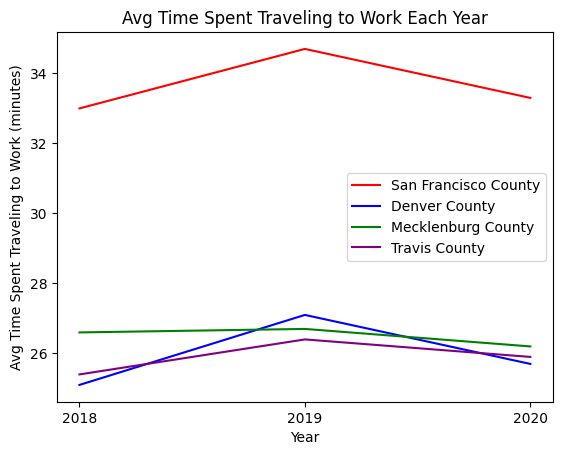

In [7]:
# plot mean time traveled to work over time
# how long does it typically take to get to work?
# make a separate dataframe
travel_time_df = pd.DataFrame({
    'San Francisco': san_francisco_df.iloc[18, 0:3],
    'Denver': denver_df.iloc[18, 0:3],
    'Mecklenburg': mecklenburg_df.iloc[18, 0:3],
    'Travis': travis_df.iloc[18, 0:3]
})
# set data types to float
travel_time_df = travel_time_df.astype('float')

years = travel_time_df.index

sanFranPlot, = plt.plot(years, travel_time_df['San Francisco'], color='red', label='San Francisco County')
denverPlot, = plt.plot(years, travel_time_df['Denver'], color='blue', label='Denver County')
mecklenburgPlot, = plt.plot(years, travel_time_df['Mecklenburg'], color='green', label='Mecklenburg County')
travisPlot, = plt.plot(years, travel_time_df['Travis'], color='purple', label='Travis County')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Avg Time Spent Traveling to Work (minutes)')
plt.title('Avg Time Spent Traveling to Work Each Year')

plt.savefig('Images/travel_time.png')
plt.show()


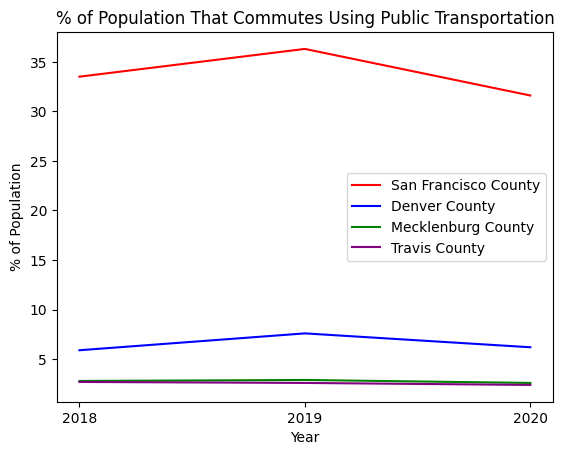

In [8]:
# reliance on public transportation
# How many people use the public transportation?
public_transportation_df = pd.DataFrame({
    'San Francisco': san_francisco_df.iloc[3, 0:3],
    'Denver': denver_df.iloc[3, 0:3],
    'Mecklenburg': mecklenburg_df.iloc[3, 0:3],
    'Travis': travis_df.iloc[3, 0:3]
})

# convert dtypes (%1.1f%%)
public_transportation_df['San Francisco'] = public_transportation_df['San Francisco'].str.rstrip('%').astype('float') # / 100 to make it 0.335
public_transportation_df['Denver'] = public_transportation_df['Denver'].str.rstrip('%').astype('float')
public_transportation_df['Mecklenburg'] = public_transportation_df['Mecklenburg'].str.rstrip('%').astype('float')
public_transportation_df['Travis'] = public_transportation_df['Travis'].str.rstrip('%').astype('float')

years = public_transportation_df.index

# make plots
sanFranPlot, = plt.plot(years, public_transportation_df['San Francisco'], color='red', label='San Francisco County')
denverPlot, = plt.plot(years, public_transportation_df['Denver'], color='blue', label='Denver County')
mecklenburgPlot, = plt.plot(years, public_transportation_df['Mecklenburg'], color='green', label='Mecklenburg County')
travisPlot, = plt.plot(years, public_transportation_df['Travis'], color='purple', label='Travis County')

plt.xlabel('Year')
plt.ylabel('% of Population')
plt.title('% of Population That Commutes Using Public Transportation')
plt.legend()

plt.savefig('Images/public_transportation.png')

plt.show()

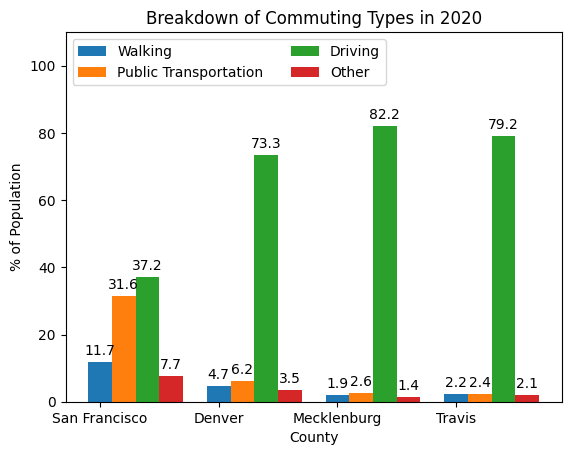

In [21]:
# grouped bar chart to compare driving, walking, public transportation
counties = ('San Francisco', 'Denver', 'Mecklenburg', 'Travis')
comparisons = {
    'Walking': (11.7, 4.7, 1.9, 2.2),
    'Public Transportation': public_transportation_df.loc['2020', :],
    'Driving': (37.2, 73.3, 82.2, 79.2),
    'Other': (7.7, 3.5, 1.4, 2.1) # ['Bicycle', 'Taxicab, motorcycle, or other means'] added together
}

x = np.arange(len(counties))
width = 0.2
multiplier = 0

plt.xticks(x, counties, rotation=0)
plt.xlabel('County')
plt.ylabel('% of Population')
plt.ylim(0, 110)

plt.title('Breakdown of Commuting Types in 2020')

for transportation_type, percent in comparisons.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, percent, width, label=transportation_type)
    plt.bar_label(rects, padding=3)
    multiplier += 1

plt.legend(loc='upper left', ncols=2)

plt.savefig('Images/commuting_breakdown.png')

plt.show()

In [22]:
# number of nearby airports
lat_lon_df = pd.DataFrame({
    'Lat':['','','',''],
    'Lon':['','','',''],
    'City': ['San Francisco', 'Denver', 'Charlotte', 'Austin']
})
# using city names instead of county names for geoapify search

params = {
    'apiKey':geoapify_key,
    'format':'json'
}
base_url = "https://api.geoapify.com/v1/geocode/search"

# loop #1 - find lat and lon of each city
for index, row in lat_lon_df.iterrows():
    city = f'{row["City"]}, United States'
    params['text'] = city
    response = requests.get(base_url, params=params).json()
    lat_lon_df.loc[index, 'Lat'] = response['results'][0]['lat']
    lat_lon_df.loc[index, 'Lon'] = response['results'][0]['lon']
    time.sleep(0.5)






airport_df = pd.DataFrame({})
airport_df['San Francisco'] = ''
airport_df['Denver'] = ''
airport_df['Charlotte'] = ''
airport_df['Austin'] = ''

# loop api calls and append each result to each column within 50 km
# set up parameters
radius = 50000
params = {
    'apiKey':geoapify_key,
    'categories':'airport',
    'limit':20
}

base_url = "https://api.geoapify.com/v2/places"

# set index of first dataframe for .loc in next loop
lat_lon_df = lat_lon_df.set_index('City')

columns = list(airport_df)




# loop #2 - find nearby airports
for i in columns:
    city = airport_df[i]

    lat = lat_lon_df.loc[i, 'Lat']
    lon = lat_lon_df.loc[i, 'Lon']

    params['filter'] = f'circle:{lon},{lat},{radius}'
    params['bias'] = f'proximity:{lon},{lat}'

    response = requests.get(base_url, params=params).json()

    # get each airport name from the results, then terminate when there are no more
    row_number = 0
    row_name = ('name' + str(row_number))

    # up to 20 times (just in case there are a lot!), add each airport name in the json response to airport_df in the next blank spot in the column
    for each in range(20):
        
        try:
            airport_df.loc[row_name, i] = response['features'][row_number]['properties']['address_line1']
            row_number += 1
            row_name = ('name' + str(row_number))
        except IndexError:
            #print('City complete.')
            break



# count column length to find number of airports

# clear NaNs
#airport_df = airport_df.fillna('')
# ^ I was trying len() but it counted NaNs

for i in columns:
    print(f'{i} has {airport_df[i].count()} airports within a 50 km radius')

San Francisco has 6 airports within a 50 km radius
Denver has 8 airports within a 50 km radius
Charlotte has 6 airports within a 50 km radius
Austin has 5 airports within a 50 km radius


In [53]:
# make map with Geoviews for Locations slide
# modify dataframe to make colors look nicer
lat_lon_df['cities'] = ['San Francisco', 'Denver', 'Charlotte', 'Austin']


city_map = lat_lon_df.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    tiles = 'OSM',
    frame_width = 900,
    frame_height = 600,
    size = 300,
    color = 'cities',
    legend = 'bottom'
)

hvplot.save(city_map, 'Images/map.png')

city_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (cities)

In [ ]:
# make a .gitignore